In [23]:
##IMPORTs
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [24]:
##Load Dataset

df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
df.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [26]:
df.isna()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [27]:
df.drop(columns=["CustomerID" , "Gender"],axis=1 , inplace=True)

In [28]:
df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


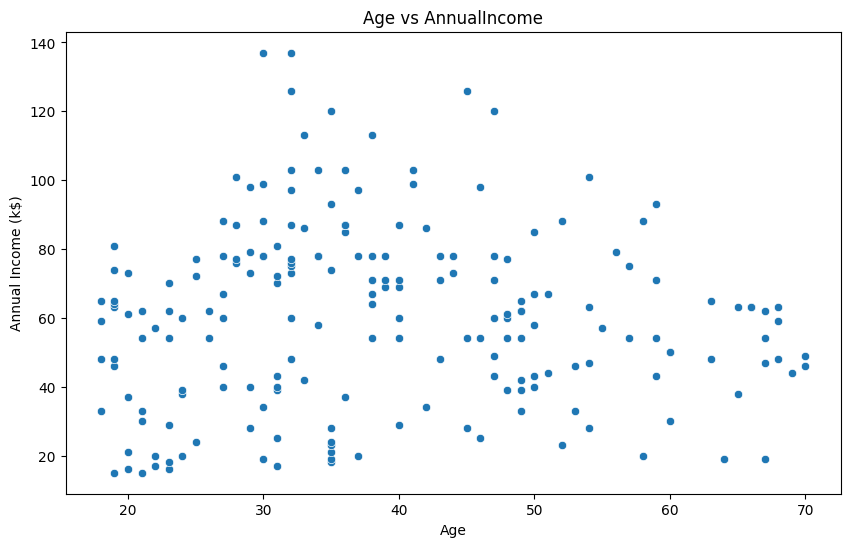

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Age" , y="Annual Income (k$)",data=df)
plt.title("Age vs AnnualIncome")
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.show()

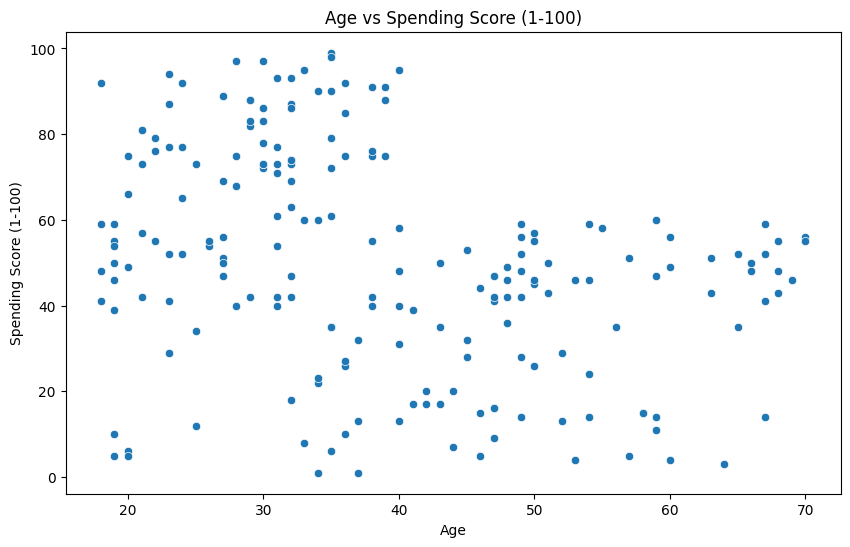

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Age" , y="Spending Score (1-100)",data=df )
plt.title("Age vs Spending Score (1-100)")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [31]:
#display skewness 
def skewness_name(skewness):
    if skewness >0:
        return "Right skewed"
    elif skewness < 0:
        return "left skewed"
    else:
        return "Normal Distribution"
    
print("Age :" , skewness_name(df['Age'].skew()))
print("Annual Income :" , skewness_name(df['Annual Income (k$)'].skew()))
print("spending score :" , skewness_name(df['Spending Score (1-100)'].skew()))

Age : Right skewed
Annual Income : Right skewed
spending score : left skewed


In [32]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df=pd.DataFrame(df_scaled , columns = df.columns)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [34]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state = 42)
kmeans.fit(df)
df["Cluster"] = kmeans.labels_
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.424569,-1.738999,-0.434801,2
1,-1.281035,-1.738999,1.195704,2
2,-1.352802,-1.700830,-1.715913,3
3,-1.137502,-1.700830,1.040418,2
4,-0.563369,-1.662660,-0.395980,2


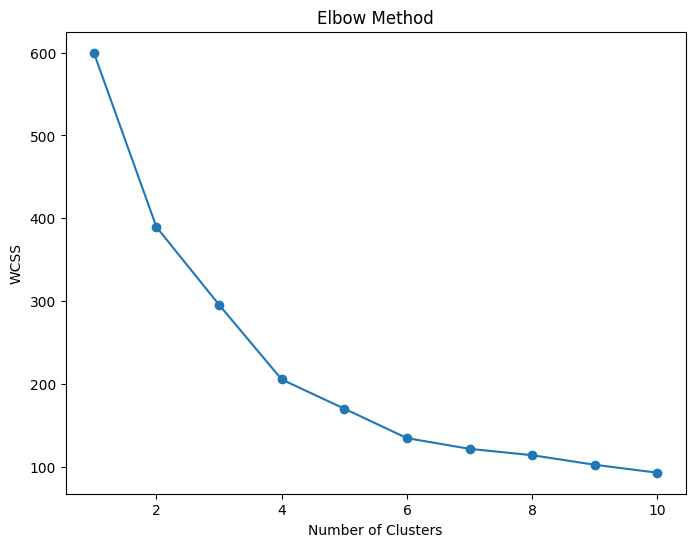

In [35]:
wcss = []
for i in range(1,11) : 
    kmeans = KMeans(n_clusters = i,random_state = 42)
    kmeans.fit(df.drop("Cluster",axis=1))
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (8,6))
plt.plot(range(1,11),wcss,marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

Text(0, 0.5, 'annual income')

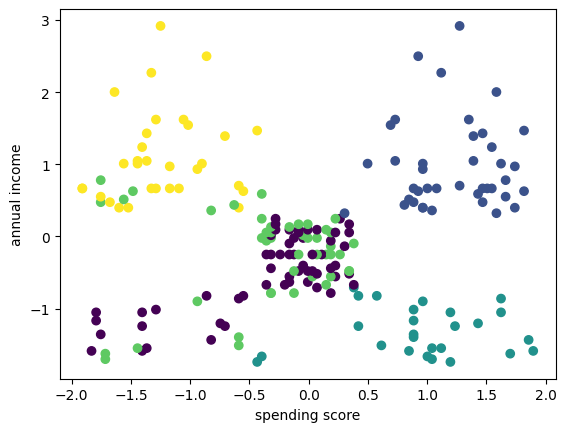

In [36]:
plt.scatter(df['Spending Score (1-100)'],
            df['Annual Income (k$)'],
            c=df['Cluster'])
plt.xlabel("spending score")
plt.ylabel('annual income')

In [37]:
df.to_csv('clustered_mall_customers.csv',index=False)

In [57]:
df_new = pd.read_csv('clustered_mall_customers.csv')


In [58]:
df_new

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.424569,-1.738999,-0.434801,2
1,-1.281035,-1.738999,1.195704,2
2,-1.352802,-1.700830,-1.715913,3
3,-1.137502,-1.700830,1.040418,2
4,-0.563369,-1.662660,-0.395980,2
...,...,...,...,...
195,-0.276302,2.268791,1.118061,1
196,0.441365,2.497807,-0.861839,4
197,-0.491602,2.497807,0.923953,1
198,-0.491602,2.917671,-1.250054,4


In [59]:
y=df_new['Cluster']
x = df_new.drop(columns=['Cluster'],axis=1)

In [60]:
x

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [61]:
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

models = {
    "Random Forest" : RandomForestClassifier(),
    "Decision Tree" : DecisionTreeClassifier(),
    "KNN" : KNeighborsClassifier()
}

for name,model in models.items() :
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(f"Model : {name}")
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))

Model : Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        10

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

[[10  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 12  0]
 [ 0  0  0  0 10]]
Model : Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         5
           2       0.60      1.00      0.75         3
           3       1.00      0.83      0.91        12
           4       1.00      1.00      1.00        10

    accuracy                           0.95       